# Module 2 - Exercise 3: Logistic Regression for Classification

<a href="https://colab.research.google.com/github/jumpingsphinx/jumpingsphinx.github.io/blob/main/notebooks/module2-regression/exercise3-logistic-regression.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

By the end of this exercise, you will be able to:

- Implement logistic regression from scratch
- Understand the sigmoid function and its properties
- Compute logistic loss (binary cross-entropy)
- Use gradient descent for optimization
- Interpret probabilities and make predictions
- Evaluate classification performance with various metrics

## Prerequisites

- Completion of Exercises 1 and 2
- Understanding of classification problems
- Familiarity with probability concepts

## Setup

Run this cell first to import required libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("NumPy version:", np.__version__)
print("Setup complete!")

NumPy version: 1.26.4
Setup complete!


---

## Part 1: The Sigmoid Function

### Background

The sigmoid function maps any real-valued number to the range (0, 1):

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Properties:
- Output range: (0, 1)
- $\sigma(0) = 0.5$
- $\sigma(-\infty) \to 0$, $\sigma(\infty) \to 1$
- Derivative: $\sigma'(z) = \sigma(z)(1 - \sigma(z))$

### Exercise 1.1: Implement the Sigmoid Function

**Task:** Implement sigmoid and visualize its shape.

z values:        [-10  -5  -1   0   1   5  10]
sigmoid(z):      [4.53978687e-05 6.69285092e-03 2.68941421e-01 5.00000000e-01
 7.31058579e-01 9.93307149e-01 9.99954602e-01]


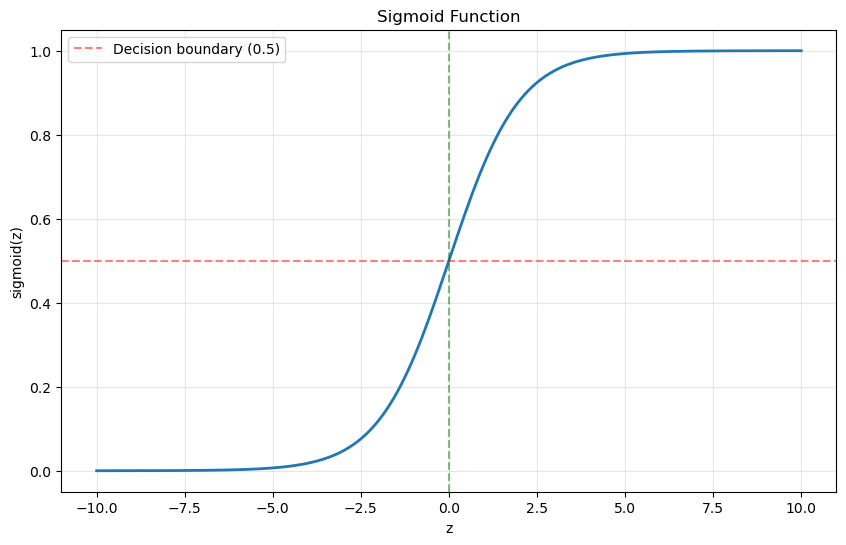


✓ Sigmoid function implemented correctly!


In [2]:
def sigmoid(z):
    """
    Compute sigmoid function.
    
    Parameters:
    -----------
    z : np.ndarray or float
        Input value(s)
    
    Returns:
    --------
    np.ndarray or float
        Sigmoid of input
    """
    return 1 / (1 + np.exp(-z))
# Test sigmoid
test_values = np.array([-10, -5, -1, 0, 1, 5, 10])
sig_values = sigmoid(test_values)

print("z values:       ", test_values)
print("sigmoid(z):     ", sig_values)

# Visualize sigmoid
z = np.linspace(-10, 10, 200)
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid(z), linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Decision boundary (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

assert np.isclose(sigmoid(0), 0.5), "sigmoid(0) should be 0.5"
assert sigmoid(-100) < 0.01, "sigmoid(-large) should be close to 0"
assert sigmoid(100) > 0.99, "sigmoid(large) should be close to 1"
print("\n✓ Sigmoid function implemented correctly!")

### Exercise 1.2: Sigmoid Derivative

**Task:** Implement the derivative of sigmoid (useful for backpropagation).

In [3]:
def sigmoid_derivative(z):
    """
    Compute derivative of sigmoid.
    
    d/dz sigmoid(z) = sigmoid(z) * (1 - sigmoid(z))
    
    Parameters:
    -----------
    z : np.ndarray or float
        Input value(s)
    
    Returns:
    --------
    np.ndarray or float
        Derivative of sigmoid at z
    """
    sig = sigmoid(z)
    return sig * (1 - sig)
print("Note: Maximum derivative is 0.25 at z=0")
print(f"sigmoid'(0) = {sigmoid_derivative(0):.4f}")

assert np.isclose(sigmoid_derivative(0), 0.25), "sigmoid'(0) should be 0.25"
print("\n✓ Sigmoid derivative implemented correctly!")

Note: Maximum derivative is 0.25 at z=0
sigmoid'(0) = 0.2500

✓ Sigmoid derivative implemented correctly!


---

## Part 2: Binary Cross-Entropy Loss

### Background

For logistic regression, we use **binary cross-entropy** (log loss):

$$J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h(\mathbf{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h(\mathbf{x}^{(i)}))]$$

Where:
- $h(\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x})$ is the hypothesis
- $y \in \{0, 1\}$ is the true label

### Exercise 2.1: Implement Binary Cross-Entropy

**Task:** Implement the binary cross-entropy cost function.

In [4]:
def binary_cross_entropy(y_true, y_pred):
    """
    Compute binary cross-entropy loss.
    
    Parameters:
    -----------
    y_true : np.ndarray
        True labels (0 or 1)
    y_pred : np.ndarray
        Predicted probabilities (between 0 and 1)
    
    Returns:
    --------
    float
        Cross-entropy loss
    """
    m = len(y_true)
    
    # Calculate loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Test the loss function
y_true = np.array([1, 0, 1, 1, 0])
y_pred_good = np.array([0.9, 0.1, 0.8, 0.95, 0.05])  # good predictions
y_pred_bad = np.array([0.1, 0.9, 0.2, 0.1, 0.9])     # bad predictions

loss_good = binary_cross_entropy(y_true, y_pred_good)
loss_bad = binary_cross_entropy(y_true, y_pred_bad)

print(f"Loss with good predictions: {loss_good:.4f}")
print(f"Loss with bad predictions:  {loss_bad:.4f}")

assert loss_good < loss_bad, "Good predictions should have lower loss"
assert loss_good < 1.0, "Good predictions should have loss < 1"
print("\n✓ Binary cross-entropy implemented correctly!")

Loss with good predictions: 0.1073
Loss with bad predictions:  2.1640

✓ Binary cross-entropy implemented correctly!


---

## Part 3: Logistic Regression with Gradient Descent

### Background

**Hypothesis:**
$$h_\mathbf{w}(\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x})$$

**Gradient:**
$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\mathbf{w}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}$$

Note: Same form as linear regression, but $h$ is now sigmoid!

### Exercise 3.1: Implement Logistic Regression

**Task:** Create a complete LogisticRegression class.

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, random_state=None):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.weights = None
        self.cost_history = []
    
    def fit(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        m, n = X.shape
        X_with_bias = np.c_[np.ones((m, 1)), X]
        self.weights = np.random.randn(n + 1) * 0.01
        
        for iteration in range(self.n_iterations):
            z = np.dot(X_with_bias, self.weights)
            predictions = 1 / (1 + np.exp(-z))
            
            errors = predictions - y
            gradients = np.dot(X_with_bias.T, errors) / m
            
            self.weights -= self.learning_rate * gradients
            
            # Compute cost safely
            epsilon = 1e-15
            pred_safe = np.clip(predictions, epsilon, 1 - epsilon)
            cost = -np.mean(y * np.log(pred_safe) + (1 - y) * np.log(1 - pred_safe))
            self.cost_history.append(cost)
        
        return self
    
    def predict_proba(self, X):
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        z = np.dot(X_with_bias, self.weights)
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X, threshold=0.5):
        probas = self.predict_proba(X)
        return (probas >= threshold).astype(int)
    
    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

### Exercise 3.2: Test on Simple 2D Data

**Task:** Test your implementation on synthetic 2D data.

Train Accuracy: 1.0000
Test Accuracy:  1.0000


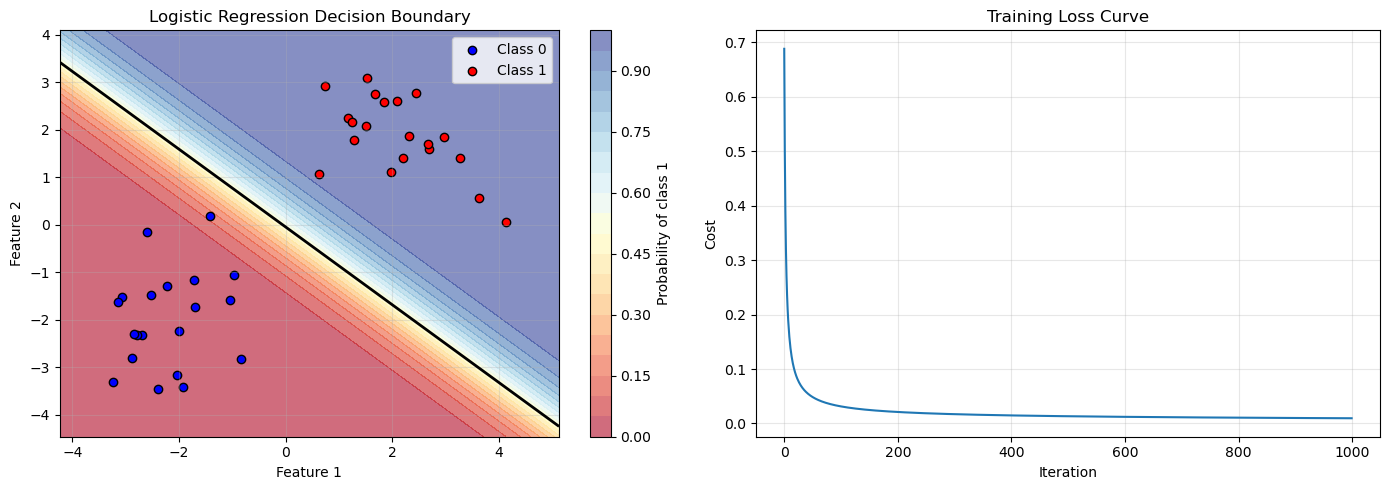


✓ Logistic regression works on 2D data!


In [6]:
# Generate linearly separable 2D data
np.random.seed(42)
n_samples = 200

# Class 0: centered at (-2, -2)
X_class0 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
y_class0 = np.zeros(n_samples // 2)

# Class 1: centered at (2, 2)
X_class1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
y_class1 = np.ones(n_samples // 2)

# Combine
X_2d = np.vstack([X_class0, X_class1])
y_2d = np.hstack([y_class0, y_class1])

# Shuffle
indices = np.random.permutation(n_samples)
X_2d = X_2d[indices]
y_2d = y_2d[indices]

# Split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42
)

# Fit model
model = LogisticRegression(learning_rate=0.1, n_iterations=1000, random_state=42)
model.fit(X_train_2d, y_train_2d)

# Evaluate
train_acc = model.score(X_train_2d, y_train_2d)
test_acc = model.score(X_test_2d, y_test_2d)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

# Plot decision boundary
def plot_decision_boundary(model, X, y, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.6)
    plt.colorbar(label='Probability of class 1')
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', edgecolors='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_test_2d, y_test_2d, 'Logistic Regression Decision Boundary')

plt.subplot(1, 2, 2)
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Loss Curve')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

assert test_acc > 0.9, "Should achieve high accuracy on linearly separable data"
print("\n✓ Logistic regression works on 2D data!")

---

## Part 4: Classification Metrics

### Background

**Confusion Matrix:**
```
                Predicted
              |  0  |  1  |
        ------|-----|-----|
Actual   0    | TN  | FP  |
         1    | FN  | TP  |
```

**Metrics:**
- **Accuracy**: (TP + TN) / Total
- **Precision**: TP / (TP + FP) - "Of predicted positives, how many are correct?"
- **Recall**: TP / (TP + FN) - "Of actual positives, how many did we find?"
- **F1 Score**: 2 × (Precision × Recall) / (Precision + Recall)

### Exercise 4.1: Implement Classification Metrics

**Task:** Implement metrics from scratch and compare with sklearn.

In [7]:
def compute_confusion_matrix(y_true, y_pred):
    """
    Compute confusion matrix.
    
    Returns: [[TN, FP], [FN, TP]]
    """
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return np.array([[tn, fp], [fn, tp]])

def compute_accuracy(y_true, y_pred):
    """Compute accuracy."""
    return np.mean(y_true == y_pred)
def compute_precision(y_true, y_pred):
    """Compute precision."""
    cm = compute_confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fp = cm[0, 1]
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0
def compute_recall(y_true, y_pred):
    """Compute recall (sensitivity)."""
    cm = compute_confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fn = cm[1, 0]
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0
def compute_f1_score(y_true, y_pred):
    """Compute F1 score."""
    precision = compute_precision(y_true, y_pred)
    recall = compute_recall(y_true, y_pred)
    if precision + recall == 0: return 0.0
    return 2 * (precision * recall) / (precision + recall)
# Test metrics
y_pred_test = model.predict(X_test_2d)

cm = compute_confusion_matrix(y_test_2d, y_pred_test)
acc = compute_accuracy(y_test_2d, y_pred_test)
prec = compute_precision(y_test_2d, y_pred_test)
rec = compute_recall(y_test_2d, y_pred_test)
f1 = compute_f1_score(y_test_2d, y_pred_test)

print("Your Metrics:")
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nSklearn Metrics:")
print(f"Accuracy:  {accuracy_score(y_test_2d, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test_2d, y_pred_test):.4f}")
print(f"Recall:    {recall_score(y_test_2d, y_pred_test):.4f}")
print(f"F1 Score:  {f1_score(y_test_2d, y_pred_test):.4f}")

assert np.isclose(acc, accuracy_score(y_test_2d, y_pred_test)), "Accuracy should match"
assert np.isclose(prec, precision_score(y_test_2d, y_pred_test)), "Precision should match"
assert np.isclose(rec, recall_score(y_test_2d, y_pred_test)), "Recall should match"
assert np.isclose(f1, f1_score(y_test_2d, y_pred_test)), "F1 should match"
print("\n✓ All metrics implemented correctly!")

Your Metrics:
Confusion Matrix:
[[20  0]
 [ 0 20]]
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Sklearn Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

✓ All metrics implemented correctly!


### Exercise 4.2: Visualize Confusion Matrix

**Task:** Create a heatmap visualization of the confusion matrix.

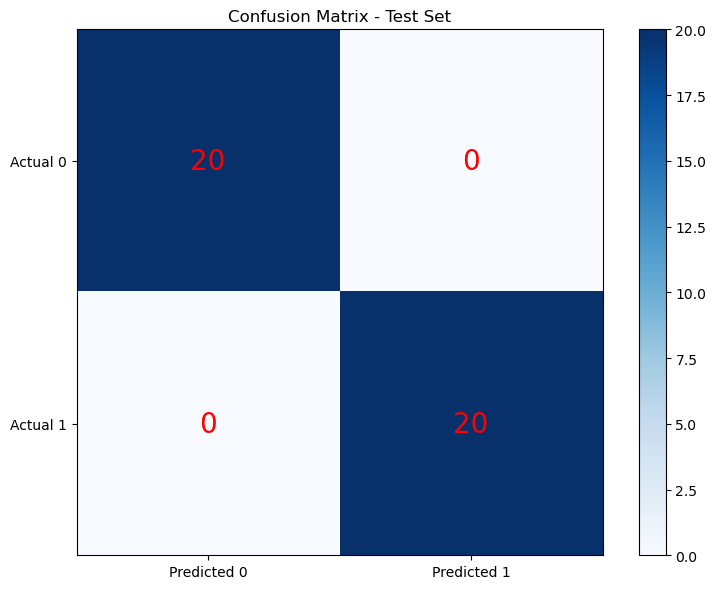

Interpretation:
True Negatives (TN):  20 - Correctly predicted class 0
False Positives (FP): 0 - Wrongly predicted class 1
False Negatives (FN): 0 - Wrongly predicted class 0
True Positives (TP):  20 - Correctly predicted class 1


In [8]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    """
    Plot confusion matrix as heatmap.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, cmap='Blues')
    
    # Add colorbar
    plt.colorbar(im, ax=ax)
    
    # Set ticks and labels
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
    ax.set_yticklabels(['Actual 0', 'Actual 1'])
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, cm[i, j],
                          ha="center", va="center", color="red", fontsize=20)
    
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, 'Confusion Matrix - Test Set')

print("Interpretation:")
print(f"True Negatives (TN):  {cm[0, 0]} - Correctly predicted class 0")
print(f"False Positives (FP): {cm[0, 1]} - Wrongly predicted class 1")
print(f"False Negatives (FN): {cm[1, 0]} - Wrongly predicted class 0")
print(f"True Positives (TP):  {cm[1, 1]} - Correctly predicted class 1")

---

## Part 5: ROC Curve and AUC

### Background

**ROC (Receiver Operating Characteristic) Curve:**
- Plots True Positive Rate (TPR) vs False Positive Rate (FPR) at various thresholds
- TPR = Recall = TP / (TP + FN)
- FPR = FP / (FP + TN)

**AUC (Area Under the Curve):**
- Perfect classifier: AUC = 1.0
- Random classifier: AUC = 0.5

### Exercise 5.1: Plot ROC Curve

**Task:** Create an ROC curve and calculate AUC.

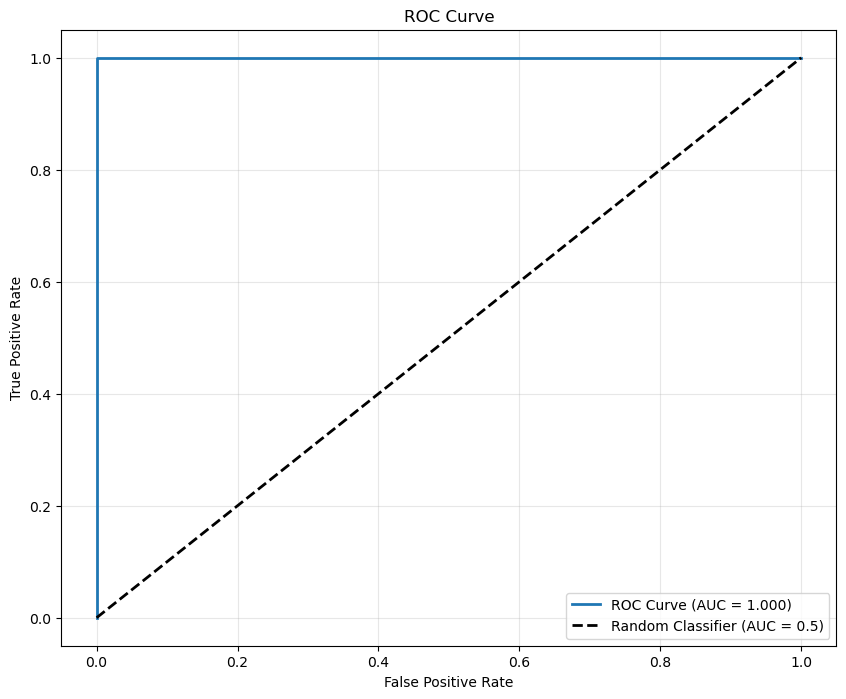

AUC Score: 1.0000

Interpretation:
- AUC = 1.0: Perfect classifier
- AUC = 0.5: Random classifier
- AUC = 1.000: Our model's performance

✓ ROC curve and AUC calculated!


In [9]:
# Get predicted probabilities
y_proba = model.predict_proba(X_test_2d)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_2d, y_proba)
auc = roc_auc_score(y_test_2d, y_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score: {auc:.4f}")
print("\nInterpretation:")
print("- AUC = 1.0: Perfect classifier")
print("- AUC = 0.5: Random classifier")
print(f"- AUC = {auc:.3f}: Our model's performance")

assert auc > 0.9, "Should have high AUC on this data"
print("\n✓ ROC curve and AUC calculated!")

### Exercise 5.2: Effect of Decision Threshold

**Task:** Explore how changing the decision threshold affects metrics.

In [10]:
# Test different thresholds
thresholds_test = [0.3, 0.5, 0.7]

print("Effect of Decision Threshold:\n")
for thresh in thresholds_test:
    y_pred_thresh = model.predict(X_test_2d, threshold=thresh)
    
    acc = accuracy_score(y_test_2d, y_pred_thresh)
    prec = precision_score(y_test_2d, y_pred_thresh)
    rec = recall_score(y_test_2d, y_pred_thresh)
    f1 = f1_score(y_test_2d, y_pred_thresh)
    
    print(f"Threshold = {thresh}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print()

print("Observations:")
print("- Lower threshold (0.3): Higher recall, lower precision")
print("- Higher threshold (0.7): Lower recall, higher precision")
print("- Trade-off between precision and recall")

Effect of Decision Threshold:

Threshold = 0.3:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Threshold = 0.5:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Threshold = 0.7:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Observations:
- Lower threshold (0.3): Higher recall, lower precision
- Higher threshold (0.7): Lower recall, higher precision
- Trade-off between precision and recall


---

## Part 6: Breast Cancer Dataset

### Exercise 6.1: Apply to Breast Cancer Classification

**Task:** Use your logistic regression on a real medical dataset.

Breast Cancer Dataset:
Shape: (569, 30)
Features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]


Your Model Performance:
Accuracy:  0.9649
Precision: 0.9857
Recall:    0.9583
F1 Score:  0.9718
AUC:       0.9960

Sklearn Accuracy: 0.9825


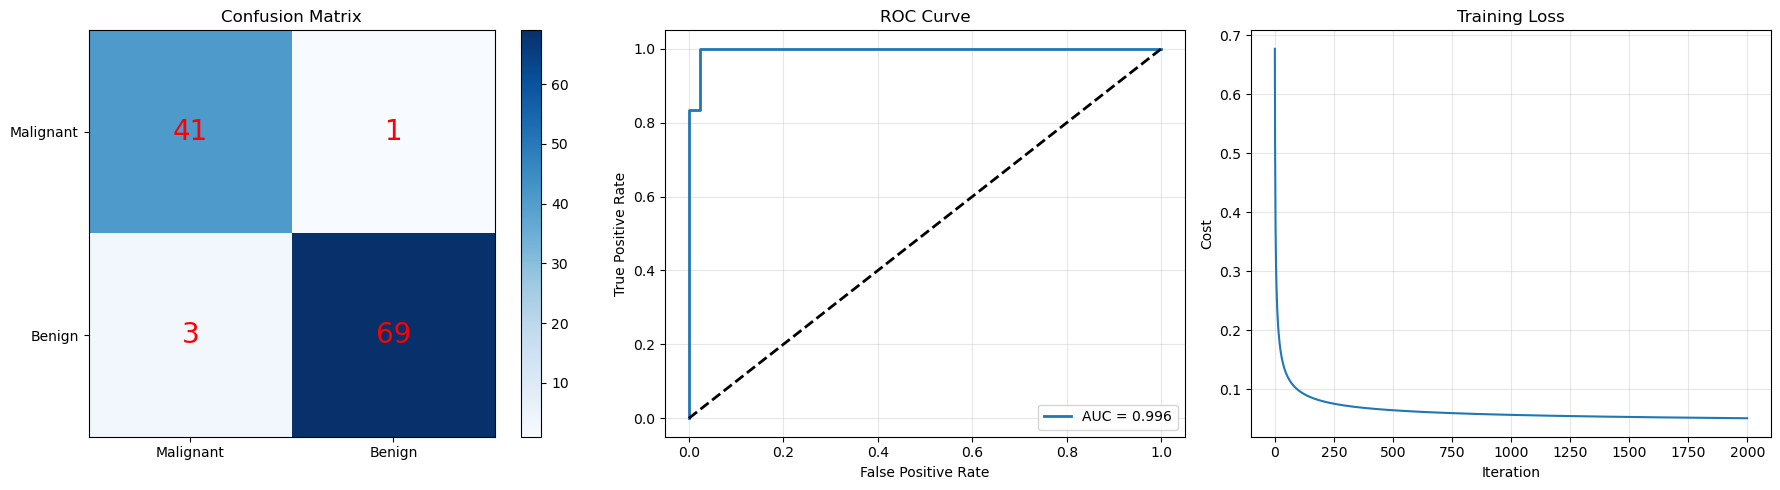


✓ Successfully applied to breast cancer dataset!


In [11]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target  # 0 = malignant, 1 = benign

print("Breast Cancer Dataset:")
print(f"Shape: {X_cancer.shape}")
print(f"Features: {len(cancer.feature_names)}")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y_cancer)}")
print()

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Scale features (important!)
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Your turn: Train your model
model_cancer = LogisticRegression(learning_rate=0.1, n_iterations=2000, random_state=42)
model_cancer.fit(X_train_c_scaled, y_train_c)
# Evaluate
y_pred_c = model_cancer.predict(X_test_c_scaled)
y_proba_c = model_cancer.predict_proba(X_test_c_scaled)

acc_c = accuracy_score(y_test_c, y_pred_c)
prec_c = precision_score(y_test_c, y_pred_c)
rec_c = recall_score(y_test_c, y_pred_c)
f1_c = f1_score(y_test_c, y_pred_c)
auc_c = roc_auc_score(y_test_c, y_proba_c)

print("\nYour Model Performance:")
print(f"Accuracy:  {acc_c:.4f}")
print(f"Precision: {prec_c:.4f}")
print(f"Recall:    {rec_c:.4f}")
print(f"F1 Score:  {f1_c:.4f}")
print(f"AUC:       {auc_c:.4f}")

# Compare with sklearn
sklearn_cancer = SklearnLogisticRegression(max_iter=1000, random_state=42)
sklearn_cancer.fit(X_train_c_scaled, y_train_c)
sklearn_acc = sklearn_cancer.score(X_test_c_scaled, y_test_c)

print(f"\nSklearn Accuracy: {sklearn_acc:.4f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion matrix
cm_c = confusion_matrix(y_test_c, y_pred_c)
im = axes[0].imshow(cm_c, cmap='Blues')
plt.colorbar(im, ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Malignant', 'Benign'])
axes[0].set_yticklabels(['Malignant', 'Benign'])
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm_c[i, j], ha="center", va="center", 
                    color="red", fontsize=20)
axes[0].set_title('Confusion Matrix')

# ROC curve
fpr_c, tpr_c, _ = roc_curve(y_test_c, y_proba_c)
axes[1].plot(fpr_c, tpr_c, linewidth=2, label=f'AUC = {auc_c:.3f}')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Loss curve
axes[2].plot(model_cancer.cost_history)
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Cost')
axes[2].set_title('Training Loss')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Successfully applied to breast cancer dataset!")

---

## Part 7: Wine Dataset (Binary Classification)

### Exercise 7.1: Binary Classification on Wine Dataset

**Task:** Convert multi-class wine dataset to binary and classify.

In [12]:
# Load wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target  # 3 classes: 0, 1, 2

# Convert to binary: class 0 vs rest (1 or 2)
y_wine_binary = (y_wine == 0).astype(int)

print("Wine Dataset (Binary):")
print(f"Shape: {X_wine.shape}")
print(f"Original classes: {wine.target_names}")
print(f"Binary: Class 0 ({wine.target_names[0]}) vs Rest")
print(f"Class distribution: {np.bincount(y_wine_binary)}")
print()

# Your turn: Complete the pipeline
# Split data
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine_binary, test_size=0.2, random_state=42, stratify=y_wine_binary
)

# Scale features
scaler_w = StandardScaler()
X_train_w_scaled = scaler_w.fit_transform(X_train_w)
X_test_w_scaled = scaler_w.transform(X_test_w)

# Train model
model_wine = LogisticRegression(learning_rate=0.1, n_iterations=2000, random_state=42)
model_wine.fit(X_train_w_scaled, y_train_w)

# Evaluate
acc_w = model_wine.score(X_test_w_scaled, y_test_w)
y_proba_w = model_wine.predict_proba(X_test_w_scaled)
auc_w = roc_auc_score(y_test_w, y_proba_w)

print(f"Test Accuracy: {acc_w:.4f}")
print(f"Test AUC:      {auc_w:.4f}")

# Print classification report
y_pred_w = model_wine.predict(X_test_w_scaled)
print("\nClassification Report:")
print(classification_report(y_test_w, y_pred_w, 
                          target_names=['Class 1&2', 'Class 0']))

print("\n✓ Successfully applied to wine dataset!")

Wine Dataset (Binary):
Shape: (178, 13)
Original classes: ['class_0' 'class_1' 'class_2']
Binary: Class 0 (class_0) vs Rest
Class distribution: [119  59]

Test Accuracy: 1.0000
Test AUC:      1.0000

Classification Report:
              precision    recall  f1-score   support

   Class 1&2       1.00      1.00      1.00        24
     Class 0       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


✓ Successfully applied to wine dataset!


---

## Part 8: Iris Dataset (Binary Classification)

### Exercise 8.1: Binary Classification on Iris Dataset

**Task:** Use only 2 features from Iris for visualization.

Iris Dataset (Binary):
Features: Petal length, Petal width
Binary: Setosa vs Versicolor/Virginica
Class distribution: [100  50]

Test Accuracy: 1.0000


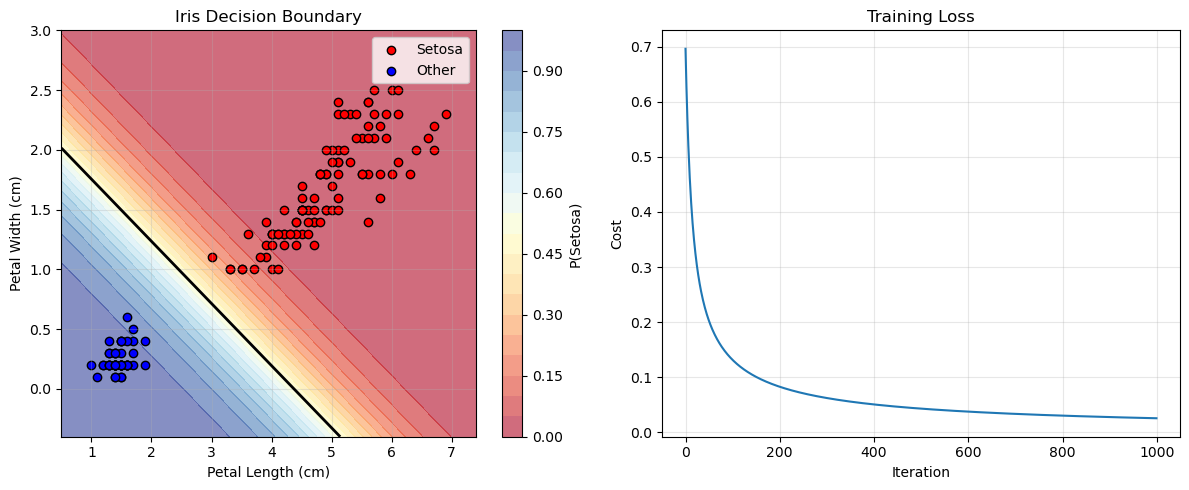


✓ Successfully applied to iris dataset!


In [13]:
# Load iris dataset
iris = load_iris()

# Use only 2 features for visualization: petal length and petal width
X_iris = iris.data[:, 2:4]  # petal features
y_iris = (iris.target == 0).astype(int)  # Setosa vs rest

print("Iris Dataset (Binary):")
print(f"Features: Petal length, Petal width")
print(f"Binary: Setosa vs Versicolor/Virginica")
print(f"Class distribution: {np.bincount(y_iris)}")
print()

# Split and scale
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

scaler_i = StandardScaler()
X_train_i_scaled = scaler_i.fit_transform(X_train_i)
X_test_i_scaled = scaler_i.transform(X_test_i)

# Train
model_iris = LogisticRegression(learning_rate=0.1, n_iterations=1000, random_state=42)
model_iris.fit(X_train_i_scaled, y_train_i)

# Evaluate
acc_i = model_iris.score(X_test_i_scaled, y_test_i)
print(f"Test Accuracy: {acc_i:.4f}")

# Plot decision boundary (with scaling)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Transform back to original scale for plotting
x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Scale the meshgrid
Z = model_iris.predict_proba(scaler_i.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.6)
plt.colorbar(label='P(Setosa)')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_iris[y_iris == 0, 0], X_iris[y_iris == 0, 1], 
           c='red', label='Setosa', edgecolors='k')
plt.scatter(X_iris[y_iris == 1, 0], X_iris[y_iris == 1, 1], 
           c='blue', label='Other', edgecolors='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(model_iris.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Successfully applied to iris dataset!")

---

## Challenge Problems (Optional)

### Challenge 1: Multi-Class Logistic Regression (Softmax)

Extend logistic regression to handle multiple classes using softmax.

In [14]:
def softmax(z):
    """
    Compute softmax function.
    
    softmax(z_i) = exp(z_i) / sum(exp(z_j))
    """
    # Your code here
    # Hint: Subtract max for numerical stability
    pass

class MultiClassLogisticRegression:
    """
    Multi-class logistic regression using softmax.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
    
    def fit(self, X, y):
        # Your code here
        pass
    
    def predict_proba(self, X):
        # Your code here
        pass
    
    def predict(self, X):
        # Your code here
        pass

print("Challenge 1: Implement multi-class logistic regression!")

Challenge 1: Implement multi-class logistic regression!


### Challenge 2: L2 Regularization

Add L2 regularization to prevent overfitting.

In [15]:
class RegularizedLogisticRegression(LogisticRegression):
    """
    Logistic regression with L2 regularization.
    
    Cost = BCE + (lambda / 2m) * sum(w^2)
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, 
                 lambda_reg=0.1, random_state=None):
        super().__init__(learning_rate, n_iterations, random_state)
        self.lambda_reg = lambda_reg
    
    def fit(self, X, y):
        # Your code here
        # Modify gradient to include regularization term
        pass

print("Challenge 2: Implement L2 regularization!")

Challenge 2: Implement L2 regularization!


### Challenge 3: Custom Loss Function

Implement focal loss for imbalanced datasets.

In [16]:
def focal_loss(y_true, y_pred, gamma=2.0):
    """
    Focal loss for imbalanced datasets.
    
    FL = -alpha * (1-p)^gamma * log(p)
    
    Focuses training on hard examples.
    """
    # Your code here
    pass

print("Challenge 3: Implement focal loss!")

Challenge 3: Implement focal loss!


---

## Reflection Questions

1. **Why use sigmoid instead of a linear function for classification?**
   - What do we want the output to represent?

2. **Why use cross-entropy instead of MSE for classification?**
   - Think about the gradient behavior

3. **When is accuracy not a good metric?**
   - Consider imbalanced datasets

4. **Precision vs Recall: Which is more important?**
   - Depends on the application (medical diagnosis, spam detection, etc.)

5. **What does AUC = 0.5 mean?**
   - Is the model learning anything?

6. **How do you choose the decision threshold?**
   - Consider the cost of false positives vs false negatives

---

## Summary

In this exercise, you learned:

✓ How to implement logistic regression from scratch  
✓ The sigmoid function and its properties  
✓ Binary cross-entropy loss for classification  
✓ Classification metrics: accuracy, precision, recall, F1  
✓ ROC curves and AUC for model evaluation  
✓ Decision boundary visualization  
✓ Application to real medical and wine datasets  
✓ Effect of decision threshold on metrics  

**Key Takeaways:**

- **Sigmoid**: Maps to (0, 1) for probability interpretation
- **Cross-entropy**: Appropriate loss for classification
- **Metrics matter**: Choose based on application
- **Threshold tuning**: Balance precision and recall
- **Feature scaling**: Essential for gradient descent
- **AUC**: Threshold-independent performance measure

**Next Steps:**

- Complete Exercise 4 on Regularization
- Review the [Logistic Regression lesson](https://jumpingsphinx.github.io/module2-regression/03-logistic-regression/)
- Experiment with multi-class classification
- Try handling imbalanced datasets

---

**Need help?** Check the solution notebook or open an issue on [GitHub](https://github.com/jumpingsphinx/jumpingsphinx.github.io/issues).